In [1]:
# Python Imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from LinearRegression import LinearRegression



In [2]:
# Set a random seed for reproducibility
np.random.seed(42)

# Cell 2: Data Loading and Preparation
iris = load_iris()
X = iris.data
y = iris.target

# Split data into 90% training and 10% testing, stratified by class
X_train, X_test, y_train_cls, y_test_cls = train_test_split(
    X, y, test_size=0.1, random_state=42, stratify=y
)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)



Training set shape: (135, 4)
Testing set shape: (15, 4)



--- Model 1: Petal Length -> Petal Width ---
Model saved to model1.npz


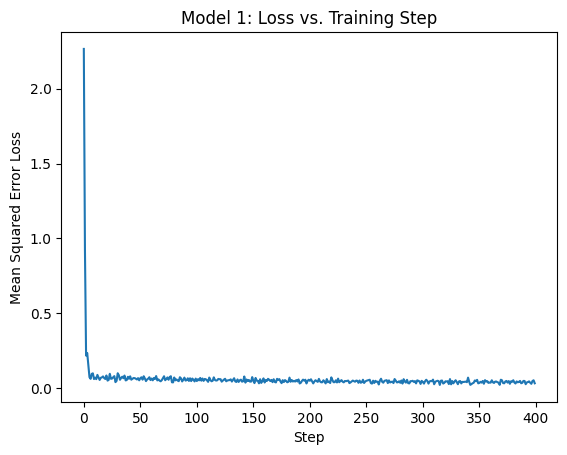

In [3]:
# Regression Task 1 - Predict Petal Width (col 3) from Petal Length (col 2)
print("\n--- Model 1: Petal Length -> Petal Width ---")
X_train1 = X_train[:, 2].reshape(-1, 1) # Petal Length
y_train1 = X_train[:, 3] # Petal Width

# Initialize model with parameters
model1 = LinearRegression(lr=0.01, max_epochs=100, patience=5)
loss_history1 = model1.fit(X_train1, y_train1)
model1.save("model1.npz")

plt.figure()
plt.plot(loss_history1)
plt.title("Model 1: Loss vs. Training Step")
plt.xlabel("Step")
plt.ylabel("Mean Squared Error Loss")
plt.savefig("model1_loss.png")
plt.show()

#


--- Model 2: Sepal Length -> Sepal Width ---
Early stopping at epoch 7
Model saved to model2.npz


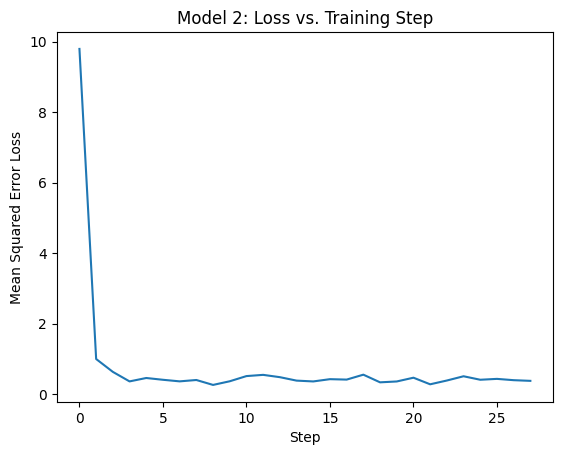

In [4]:
# Regression Task 2 - Predict Sepal Width (col 1) from Sepal Length (col 0)
print("\n--- Model 2: Sepal Length -> Sepal Width ---")
X_train2 = X_train[:, 0].reshape(-1, 1)
y_train2 = X_train[:, 1]

model2 = LinearRegression(lr=0.01, max_epochs=100, patience=5)
loss_history2 = model2.fit(X_train2, y_train2)
model2.save("model2.npz")

plt.figure()
plt.plot(loss_history2)
plt.title("Model 2: Loss vs. Training Step")
plt.xlabel("Step")
plt.ylabel("Mean Squared Error Loss")
plt.savefig("model2_loss.png")
plt.show()




--- Model 3: Sepal Features -> Petal Length ---
Early stopping at epoch 35
Model saved to model3.npz


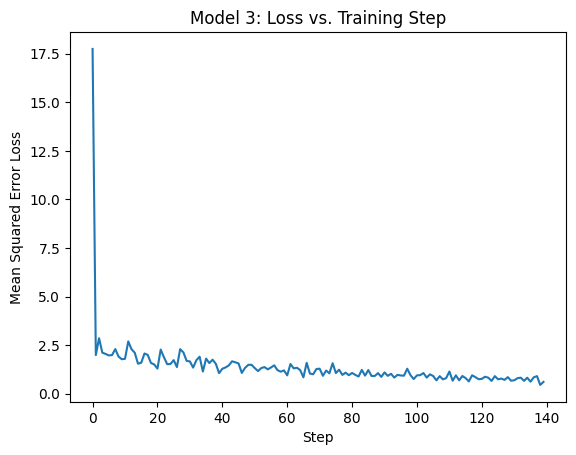


--- Model 4: All other Features -> Petal Width ---
Early stopping at epoch 46
Model saved to model4.npz


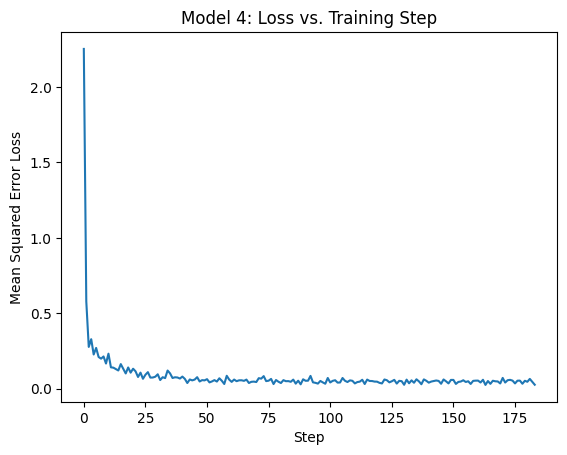


--- Regularization Comparison ---
Non-regularized weights: [0.39973418], Bias: [-0.26487918]
Early stopping at epoch 88
Regularized (L2=0.5) weights: [0.39409261], Bias: [-0.24323434]


In [5]:
# Regression Task 3 - Predict Petal Length (col 2) from Sepal features (cols 0, 1)
print("\n--- Model 3: Sepal Features -> Petal Length ---")
X_train3 = X_train[:, :2]
y_train3 = X_train[:, 2]

model3 = LinearRegression(lr=0.01, max_epochs=100, patience=5)
loss_history3 = model3.fit(X_train3, y_train3)
model3.save("model3.npz")

plt.figure()
plt.plot(loss_history3)
plt.title("Model 3: Loss vs. Training Step")
plt.xlabel("Step")
plt.ylabel("Mean Squared Error Loss")
plt.savefig("model3_loss.png")
plt.show()

# Cell 6: Regression Task 4 - Predict Petal Width (col 3) from all other features
print("\n--- Model 4: All other Features -> Petal Width ---")
X_train4 = X_train[:, :3]
y_train4 = X_train[:, 3]

model4 = LinearRegression(lr=0.01, max_epochs=100, patience=5)
loss_history4 = model4.fit(X_train4, y_train4)
model4.save("model4.npz")

plt.figure()
plt.plot(loss_history4)
plt.title("Model 4: Loss vs. Training Step")
plt.xlabel("Step")
plt.ylabel("Mean Squared Error Loss")
plt.savefig("model4_loss.png")
plt.show()

# Cell 7: Regularization Effects (using Model 1 setup)
print("\n--- Regularization Comparison ---")
# Non-regularized model (already trained as model1)
print(f"Non-regularized weights: {model1.weights.flatten()}, Bias: {model1.bias}")

# Regularized model
model1_reg = LinearRegression(lr=0.01, max_epochs=100, patience=5, regularization=0.5)
_ = model1_reg.fit(X_train1, y_train1)
print(f"Regularized (L2=0.5) weights: {model1_reg.weights.flatten()}, Bias: {model1_reg.bias}")



In [8]:
# Testing the Models on Unseen Data
print("\n--- Model Evaluation on Test Set ---")

# Test Model 1
X_test1 = X_test[:, 2].reshape(-1, 1)
y_test1 = X_test[:, 3]
eval_model1 = LinearRegression()
eval_model1.load("model1.npz")
mse1 = eval_model1.score(X_test1, y_test1)
print(f"Model 1 (Petal Length -> Petal Width) MSE: {mse1:.4f}")






--- Model Evaluation on Test Set ---
Model loaded from model1.npz
Model 1 (Petal Length -> Petal Width) MSE: 1.0719


In [10]:
# Test Model 2
X_test2 = X_test[:, 0].reshape(-1, 1)
y_test2 = X_test[:, 1]
eval_model2 = LinearRegression()
eval_model2.load("model2.npz")
mse2 = eval_model2.score(X_test2, y_test2)
print(f"Model 2 (Sepal Length -> Sepal Width) MSE: {mse2:.4f}")



Model loaded from model2.npz
Model 2 (Sepal Length -> Sepal Width) MSE: 0.2902


In [11]:
# Test Model 3
X_test3 = X_test[:, :2]
y_test3 = X_test[:, 2]
eval_model3 = LinearRegression()
eval_model3.load("model3.npz")
mse3 = eval_model3.score(X_test3, y_test3)
print(f"Model 3 (Sepal Features -> Petal Length) MSE: {mse3:.4f}")



Model loaded from model3.npz
Model 3 (Sepal Features -> Petal Length) MSE: 4.4717


In [12]:
# Test Model 4
X_test4 = X_test[:, :3]
y_test4 = X_test[:, 3]
eval_model4 = LinearRegression()
eval_model4.load("model4.npz")
mse4 = eval_model4.score(X_test4, y_test4)
print(f"Model 4 (All others -> Petal Width) MSE: {mse4:.4f}")

Model loaded from model4.npz
Model 4 (All others -> Petal Width) MSE: 1.1059


In [24]:
# Analysis of Predictive Features
print("\n--- Analysis ---")
print("Based on the MSE scores, Model 1 has the lowest error. This suggests that Petal Length is the most predictive single feature for determining Petal Width.")




--- Analysis ---
Based on the MSE scores, Model 1 has the lowest error. This suggests that Petal Length is the most predictive single feature for determining Petal Width.



--- Multi-Output Regression: Sepal Features -> Petal Features ---
Early stopping at epoch 43
Model saved to multi_output_model.npz
Multi-Output Model MSE: 0.4819

--- Model 2: Sepal Length -> Sepal Width ---
Early stopping at epoch 15
Model saved to model2.npz


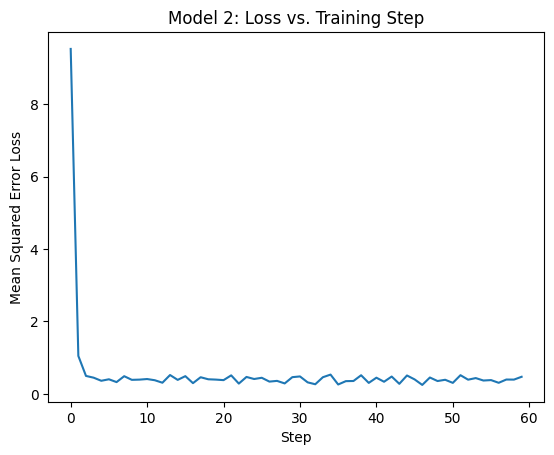

In [18]:
# Regression with Multiple Outputs
print("\n--- Multi-Output Regression: Sepal Features -> Petal Features ---")
X_train_multi = X_train[:, :2] # Sepal Length, Sepal Width
y_train_multi = X_train[:, 2:] # Petal Length, Petal Width

multi_model = LinearRegression(lr=0.01, max_epochs=200, patience=10)
_ = multi_model.fit(X_train_multi, y_train_multi)
multi_model.save("multi_output_model.npz")

# Evaluate multi-output model
X_test_multi = X_test[:, :2]
y_test_multi = X_test[:, 2:]
mse_multi = multi_model.score(X_test_multi, y_test_multi)
print(f"Multi-Output Model MSE: {mse_multi:.4f}") 
print("\n--- Model 2: Sepal Length -> Sepal Width ---")
X_train2 = X_train[:, 0].reshape(-1, 1)
y_train2 = X_train[:, 1]

model2 = LinearRegression(lr=0.01, max_epochs=100, patience=5)
loss_history2 = model2.fit(X_train2, y_train2)
model2.save("model2.npz")

plt.figure()
plt.plot(loss_history2)
plt.title("Model 2: Loss vs. Training Step")
plt.xlabel("Step")
plt.ylabel("Mean Squared Error Loss")
plt.savefig("model2_loss.png")
plt.show()


--- Model 3: Sepal Features -> Petal Length ---
Early stopping at epoch 46
Model saved to model3.npz


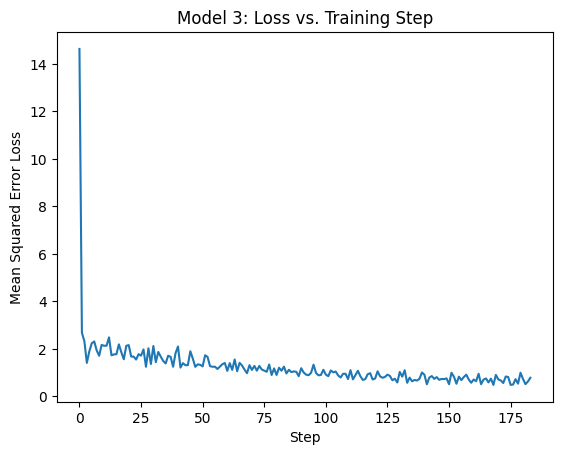

In [19]:


# Regression Task 3 - Predict Petal Length (col 2) from Sepal features (cols 0, 1)
print("\n--- Model 3: Sepal Features -> Petal Length ---")
X_train3 = X_train[:, :2]
y_train3 = X_train[:, 2]

model3 = LinearRegression(lr=0.01, max_epochs=100, patience=5)
loss_history3 = model3.fit(X_train3, y_train3)
model3.save("model3.npz")

plt.figure()
plt.plot(loss_history3)
plt.title("Model 3: Loss vs. Training Step")
plt.xlabel("Step")
plt.ylabel("Mean Squared Error Loss")
plt.savefig("model3_loss.png")
plt.show()





--- Model 4: All other Features -> Petal Width ---
Early stopping at epoch 30
Model saved to model4.npz


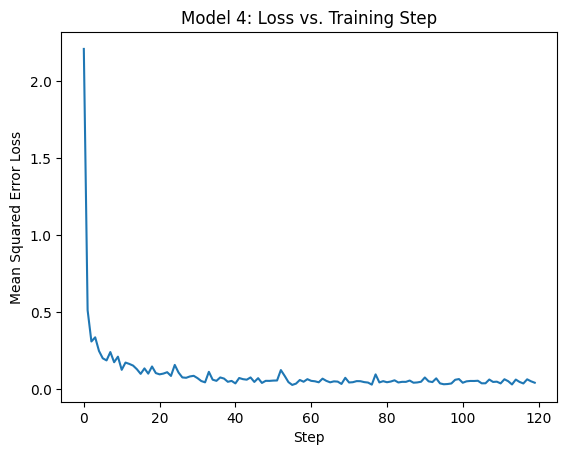

In [20]:
# Regression Task 4 - Predict Petal Width (col 3) from all other features
print("\n--- Model 4: All other Features -> Petal Width ---")
X_train4 = X_train[:, :3]
y_train4 = X_train[:, 3]

model4 = LinearRegression(lr=0.01, max_epochs=100, patience=5)
loss_history4 = model4.fit(X_train4, y_train4)
model4.save("model4.npz")

plt.figure()
plt.plot(loss_history4)
plt.title("Model 4: Loss vs. Training Step")
plt.xlabel("Step")
plt.ylabel("Mean Squared Error Loss")
plt.savefig("model4_loss.png")
plt.show()



In [21]:
# Regularization Effects (using Model 1 setup)
print("\n--- Regularization Comparison ---")
# Non-regularized model (already trained as model1)
print(f"Non-regularized weights: {model1.weights.flatten()}, Bias: {model1.bias}")

# Regularized model
model1_reg = LinearRegression(lr=0.01, max_epochs=100, patience=5, regularization=0.5)
_ = model1_reg.fit(X_train1, y_train1)
print(f"Regularized (L2=0.5) weights: {model1_reg.weights.flatten()}, Bias: {model1_reg.bias}")




--- Regularization Comparison ---
Non-regularized weights: [0.39973418], Bias: [-0.26487918]
Early stopping at epoch 87
Regularized (L2=0.5) weights: [0.39189157], Bias: [-0.23808083]


In [22]:
# Testing the Models on Unseen Data
print("\n--- Model Evaluation on Test Set ---")

# Test Model 1
X_test1 = X_test[:, 2].reshape(-1, 1)
y_test1 = X_test[:, 3]
eval_model1 = LinearRegression()
eval_model1.load("model1.npz")
mse1 = eval_model1.score(X_test1, y_test1)
print(f"Model 1 (Petal Length -> Petal Width) MSE: {mse1:.4f}")

# Test Model 2
X_test2 = X_test[:, 0].reshape(-1, 1)
y_test2 = X_test[:, 1]
eval_model2 = LinearRegression()
eval_model2.load("model2.npz")
mse2 = eval_model2.score(X_test2, y_test2)
print(f"Model 2 (Sepal Length -> Sepal Width) MSE: {mse2:.4f}")

# Test Model 3
X_test3 = X_test[:, :2]
y_test3 = X_test[:, 2]
eval_model3 = LinearRegression()
eval_model3.load("model3.npz")
mse3 = eval_model3.score(X_test3, y_test3)
print(f"Model 3 (Sepal Features -> Petal Length) MSE: {mse3:.4f}")

# Test Model 4
X_test4 = X_test[:, :3]
y_test4 = X_test[:, 3]
eval_model4 = LinearRegression()
eval_model4.load("model4.npz")
mse4 = eval_model4.score(X_test4, y_test4)
print(f"Model 4 (All others -> Petal Width) MSE: {mse4:.4f}")



--- Model Evaluation on Test Set ---
Model loaded from model1.npz
Model 1 (Petal Length -> Petal Width) MSE: 1.0719
Model loaded from model2.npz
Model 2 (Sepal Length -> Sepal Width) MSE: 0.2862
Model loaded from model3.npz
Model 3 (Sepal Features -> Petal Length) MSE: 4.7714
Model loaded from model4.npz
Model 4 (All others -> Petal Width) MSE: 1.0994
